> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
>● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
>● ‘Neighborhood’ indicates the location of the hospital.
>● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
you can find more descriptive details about the data set on Kaggle through the link [here](https://www.kaggle.com/joniarroba/noshowappointments). 
>The dataset consists only of 1 tables with the following columns:
>• PatientId
>• AppointmentID
>• Gender
>• ScheduledDay
>• AppointmentDay
>• Age
>• Neighbourhood
>• Scholarship
>• Hipertension
>• Diabetes
>• Alcoholism
>• Handcap
>• SMS_received
>• No-show


### Question(s) for Analysis
>1- Does a specific gender has a higher tendency of no shows?<br>
2- Is booking an appointment at a longer time spans affects the no show ratio?<br>
3- Does certain age group have a higher tendency for no shows?<br>
4- Do customers with long term disorders have a lower tendency to no shows?<br>
5- Do certain neighbourhoods have a higher probability of no shows?

In [5]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


no missing data in any column, but some columns data types will need to be adjusted!

**Renaming Columns** the following step will rename columns to lower case, luckly we have no headers with spaces!

In [10]:
df.rename(columns = lambda x: x.lower(), inplace = True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

**Adjusting Date Columns** the following few steps will convert the schedule day and apppointment day columns into dates,
and creates a new column for schedule time, it will also create another column with the difference in days between the schedule day and appointment day

In [25]:
df['scheduletime'] = pd.to_datetime(df['scheduledday']).dt.time
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
patientid          110527 non-null float64
appointmentid      110527 non-null int64
gender             110527 non-null object
scheduledday       110527 non-null datetime64[ns]
appointmentday     110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
no-show            110527 non-null object
booking_in_days    110527 non-null timedelta64[ns]
scheduletime       110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(4), timedelta64[ns](1)
memory usage: 13.5+ MB


In [26]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,booking_in_days,scheduletime
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52,00:00:00
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33,00:00:00
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56,00:00:00
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29,00:00:00
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37,00:00:00


In [56]:
df['booking_in_days'] = (pd.to_datetime(df['appointmentday']) - pd.to_datetime(df['scheduledday']))/np.timedelta64(1, 'D')
df.booking_in_days = df.booking_in_days.astype(int)
df.query('booking_in_days < 0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,booking_in_days,scheduletime
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1,00:00:00
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1,00:00:00
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1,00:00:00
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6,00:00:00
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1,00:00:00


**Note:** some rows shows that the schedule has been made in later date after the appointment day which is not a valid argument, 
consequently these rows will be dropped from the analysis

In [71]:
row_ind = df[df['booking_in_days'] < 0].index
df = df.drop(row_ind, axis=0)
df.query('booking_in_days < 0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,booking_in_days,scheduletime


In [75]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,booking_in_days
count,1.105220e+05,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,1.474935e+14,5.675305e+06,37.089041,0.098270,0.197255,0.071868,0.030401,0.022231,0.321040,10.184253
std,2.560866e+14,7.129722e+04,23.110064,0.297681,0.397928,0.258270,0.171689,0.161493,0.466878,15.255115
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173700e+13,5.680574e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439277e+13,5.725525e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Gender Correlation!)

no-show
No     0.798104
Yes    0.201896
Name: patientid, dtype: float64


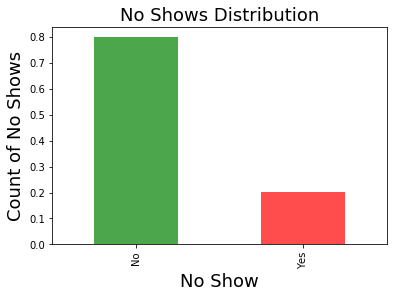

In [118]:
pct_noshows = df.groupby('no-show').count()['patientid'] / df['no-show'].count()
colors = ['green','red','green','red']
pct_noshows.plot(kind='bar', color=colors, alpha=.7)
plt.xlabel('No Show', fontsize=18)
plt.ylabel('Count of No Shows', fontsize=18)
plt.title('No Shows Distribution', fontsize=18);
print(pct_noshows)

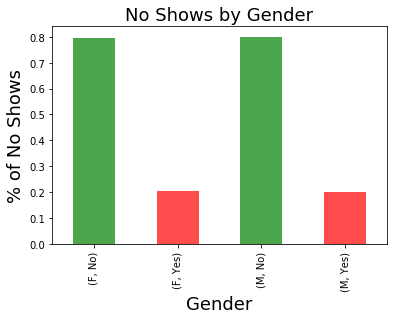

In [202]:
colors = ['green','red','green','red']
noshow_counts = df.groupby(['gender','no-show']).count()['patientid']
noshow_totals = df.groupby('gender').count()['patientid']
proportions = noshow_counts / noshow_totals
proportions.plot(x='gender',kind='bar', color=colors, alpha=.7, stacked=True)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('% of No Shows', fontsize=18)
plt.title('No Shows by Gender', fontsize=18);

the above proves that gender has no coorelation with the no show status as both males and females had a 20% no show ratio from their respective visits

### Research Question 2  (Correlation to the Time Span of Appointment Scheduling!)

In [122]:
df['booking_in_days'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: booking_in_days, dtype: float64

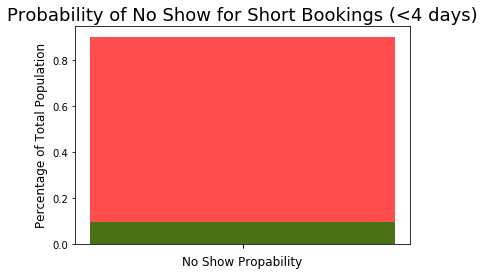

In [176]:
df_short_bk = df.query('booking_in_days < 4')
short_pns = df_short_bk.groupby('no-show').count()['age'] / df_short_bk['no-show'].count()
plt.bar([1],short_pns, tick_label = [''], color= ['red','green'], alpha=.7, width= .05)
plt.legend(loc="upper right")
plt.title("Probability of No Show for Short Bookings (<4 days)", fontsize = 18)
plt.xlabel('No Show Propability', fontsize=12)
plt.ylabel('Percentage of Total Population', fontsize=12);

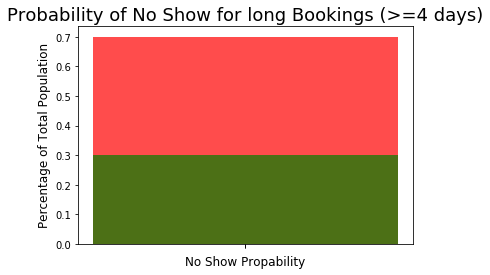

In [200]:
df_long_bk = df.query('booking_in_days >= 4')
long_pns = df_long_bk.groupby('no-show').count()['age'] / df_long_bk['no-show'].count()
plt.bar([1],long_pns, tick_label = [''], color= ['red','green'], alpha=.7, width= .05)
plt.legend(loc="upper right")
plt.title("Probability of No Show for long Bookings (>=4 days)", fontsize = 18)
plt.xlabel('No Show Propability', fontsize=12)
plt.ylabel('Percentage of Total Population', fontsize=12);

**Consclusion:** time of booking before an appointment has a strong correlation with the no show probability.

### Research Question 3  (Correlation to Age Groups!)

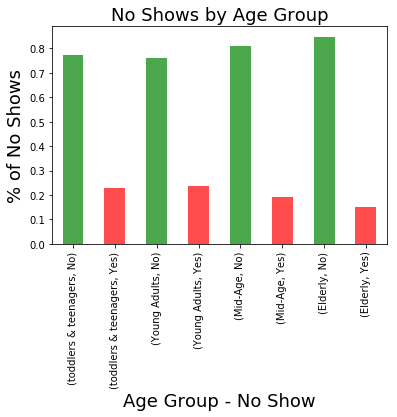

In [201]:
colors = ['green','red','green','red','green','red','green','red']
age_binz = [0,19,35,60,100]
age_labels = ['toddlers & teenagers','Young Adults','Mid-Age','Elderly']
df['age_range'] = pd.cut(df['age'],bins=age_binz,labels=age_labels)
age_plot = df.groupby(['age_range','no-show']).count()['patientid'] / df.groupby('age_range').count()['patientid']
age_plot.plot(x='gender',kind='bar', color=colors, alpha=.7, stacked=True)
plt.xlabel('Age Group - No Show', fontsize=18)
plt.ylabel('% of No Shows', fontsize=18)
plt.title('No Shows by Age Group', fontsize=18);

**Conclusion** there is a inverse proportional relationship between age and probability of no show

### Research Question 4  (Correlation to Long Term Disorders!)

In [204]:
df['ltd'] = df['diabetes'] + df['hipertension'] + df['alcoholism'] + df['handcap']
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,booking_in_days,scheduletime,age_range,ltd
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,00:00:00,Elderly,1
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,00:00:00,Mid-Age,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,00:00:00,Elderly,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,00:00:00,toddlers & teenagers,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,00:00:00,Mid-Age,2


In [205]:
df['ltd'].describe()

count    110522.000000
mean          0.321755
std           0.631386
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: ltd, dtype: float64

In [216]:
ns_df = df[df['no-show'] == "Yes"]
ns_df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,booking_in_days,scheduletime,age_range,ltd
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2,00:00:00,Young Adults,0
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2,00:00:00,Mid-Age,0
11,7.542951e+12,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,3,00:00:00,Young Adults,0
17,1.479497e+13,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes,1,00:00:00,Mid-Age,0
20,6.222575e+14,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,2,00:00:00,Young Adults,0


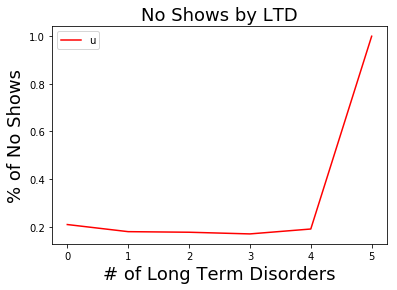

In [225]:
ns_ltd = ns_df.groupby('ltd').count()['patientid'] / df.groupby('ltd').count()['patientid']
ns_ltd.plot(kind='line', color='red', label='LTD')
plt.xlabel('# of Long Term Disorders', fontsize=18)
plt.ylabel('% of No Shows', fontsize=18)
plt.title('No Shows by LTD', fontsize=18);

In [ ]:
### Research Question 4  (Correlation to Long Term Disorders!)

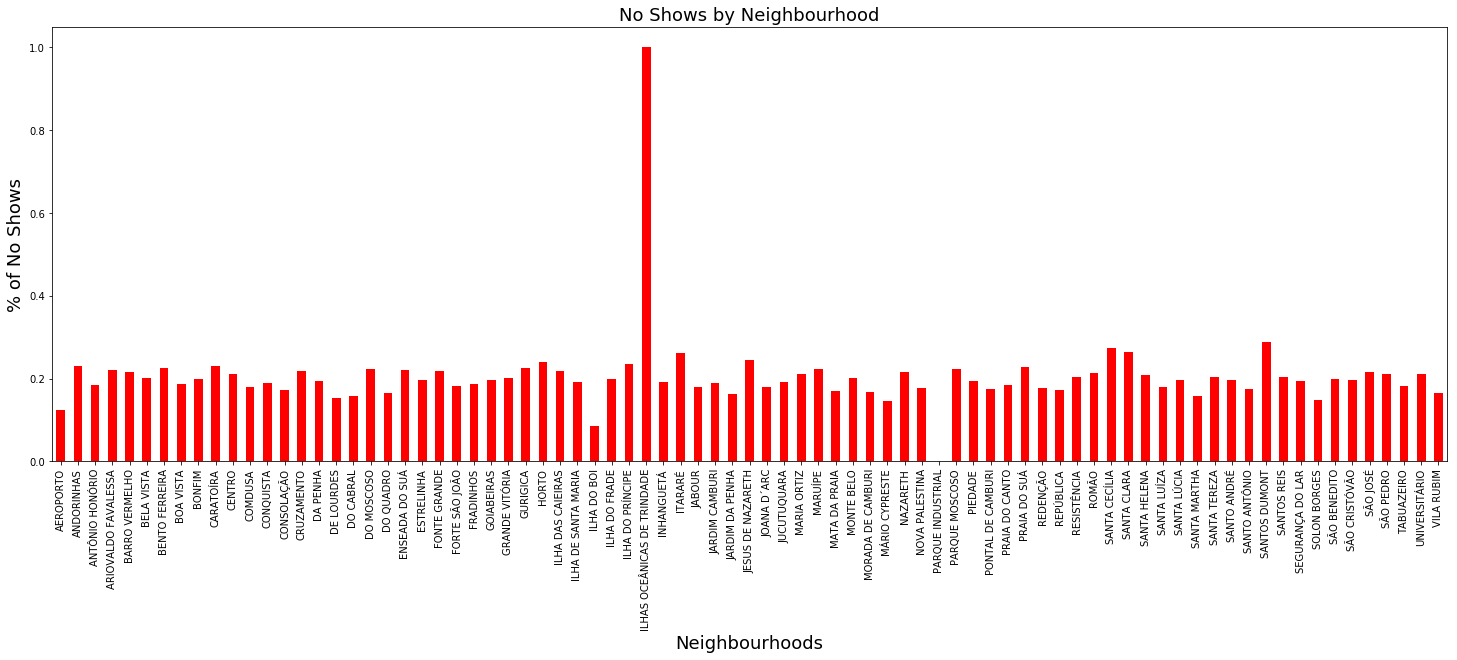

In [232]:
ns_ltd_ngbr = ns_df.groupby('neighbourhood').count()['patientid'] / df.groupby('neighbourhood').count()['patientid']
ns_ltd_ngbr.plot(kind='bar', color='red', label='LTD',figsize=(25,8))
plt.xlabel('Neighbourhoods', fontsize=18)
plt.ylabel('% of No Shows', fontsize=18)
plt.title('No Shows by Neighbourhood', fontsize=18);

**Note** ILHAS OCEÂNICAS DE TRINDADE has only 2 observations which is not an indicator to a tendency

<a id='conclusions'></a>
## Conclusions

>1- No Shows represent 20% of the total population, i.e. 2 out of every 10 visits the patient doesn't show up <br>
2- there is no tendencies based on gender <br>
3- there is a inverse proportional relationship between age and probability of no show <br>
4- patients with 1 more long term disorders still had the same probability of no show same as patients with no long term disorders <br>
5- almost all the neighbourhoods have the same probability of no show (+/- 20%)


### Limitations
> medical insurance details for those patients were not available, as it could be a main factor for people not showing to their appointments due to the absence of a cost.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [241]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0